# Part 1: Data Preprocessing & Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset

In [2]:
df = pd.read_csv('preprocessed_data_LA.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,T,TM,Tm,SLP,H,PP,VV,V,VM,PM2.5
0,14.75,20.85,9.2,1023.95,45.0,0.0,16.10,4.20,16.75,18.644444
1,13.70,19.00,10.0,1013.95,70.0,0.0,12.65,4.50,12.95,26.358824
2,14.80,20.15,9.9,1017.85,69.0,0.0,16.10,4.90,18.60,10.700000
3,13.05,16.40,9.5,1013.30,54.5,0.0,16.10,12.50,24.15,4.788889
4,17.15,21.40,12.2,1012.20,48.5,0.0,16.10,11.75,33.25,8.733333


#### What about Missing Values?

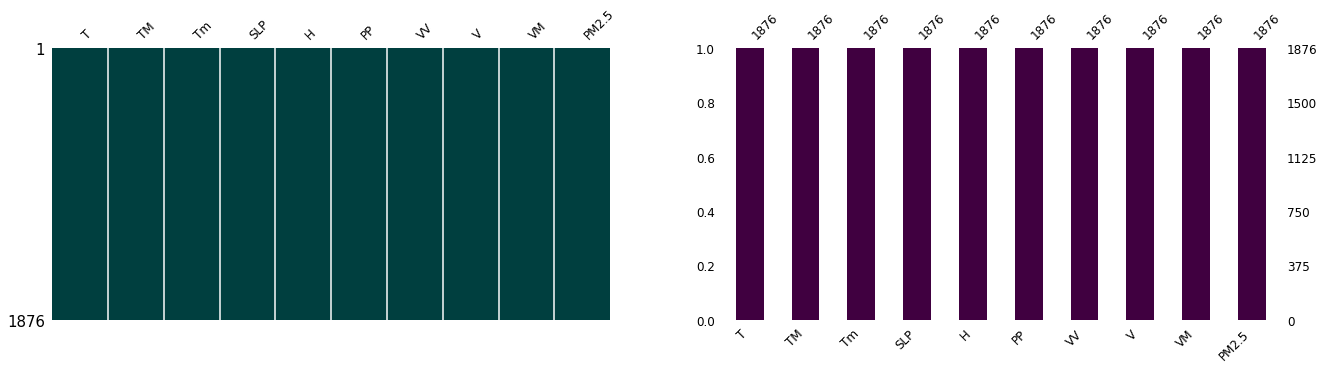

In [3]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,5))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

## Corelation between the Features

### Linearly Corelated

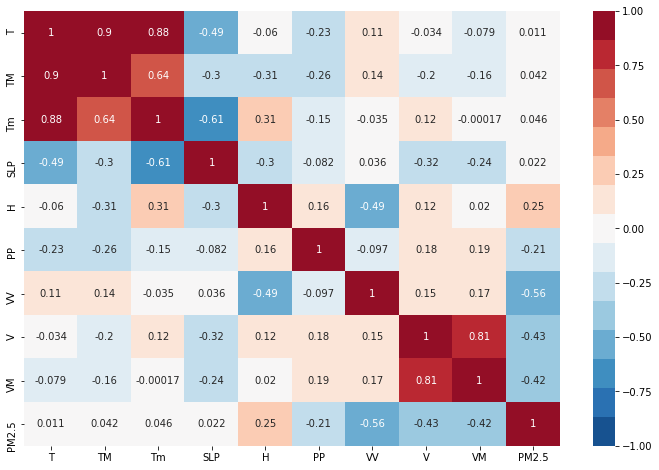

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='pearson'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

### Monotonically Corelated

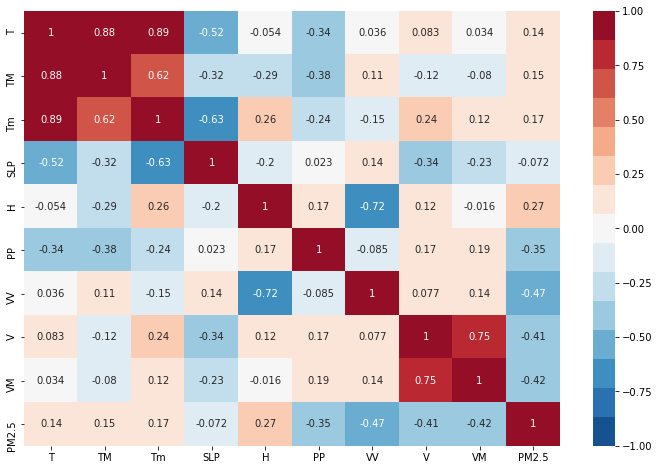

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

C:\Users\sumai\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


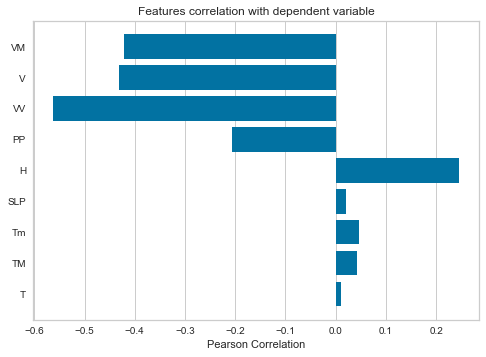

<Figure size 576x396 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.target.feature_correlation import feature_correlation

X = df.drop('PM2.5', axis = 1)
y = df['PM2.5']

# Create a list of the feature names
features = X.columns.to_list()

visualizer = feature_correlation(X, y, labels=features)
plt.tight_layout()

###  Univariate Analysis

#### Continuous Features

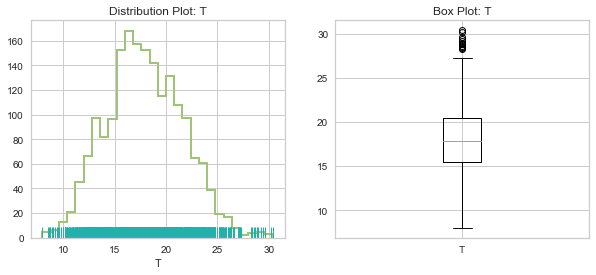

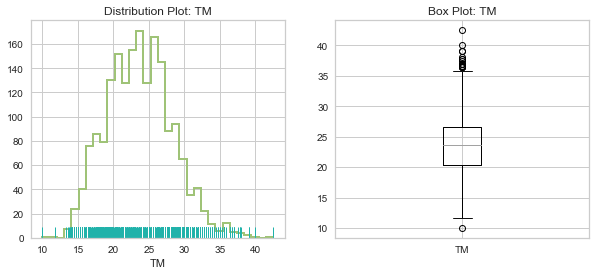

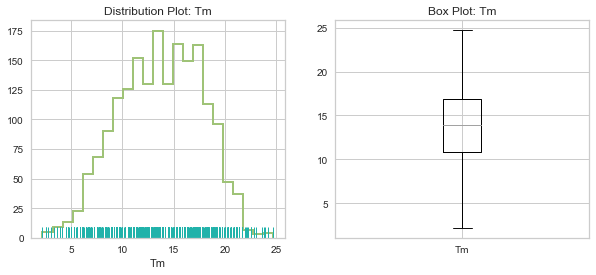

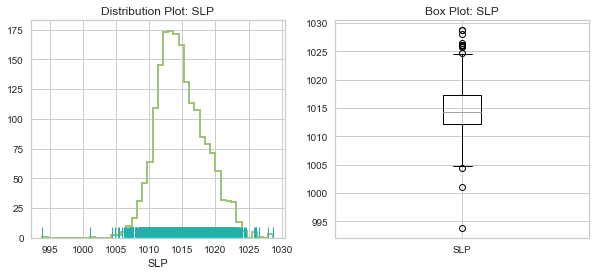

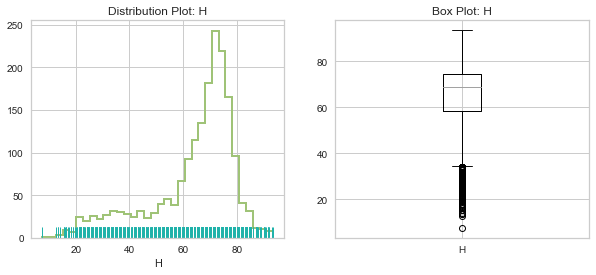

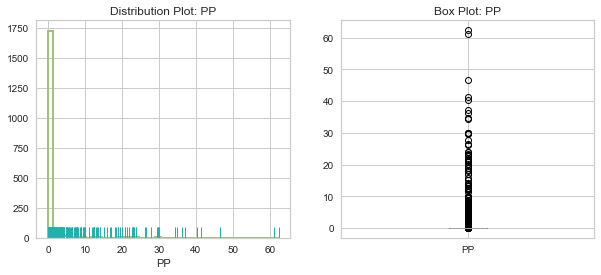

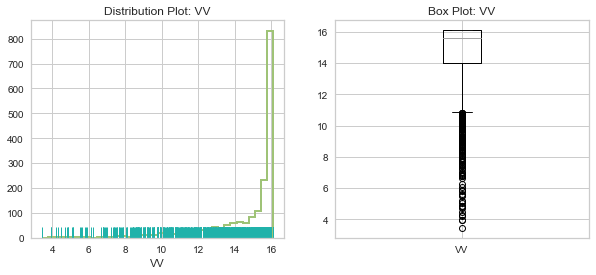

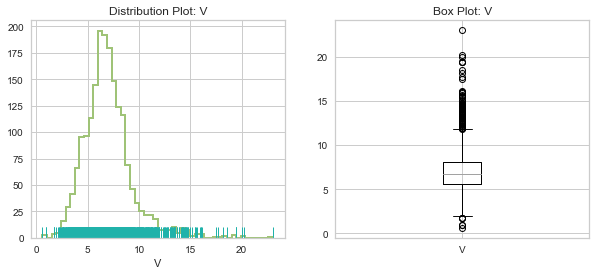

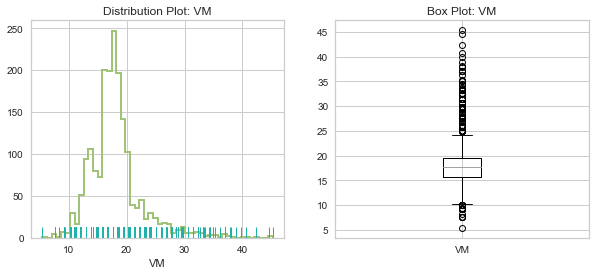

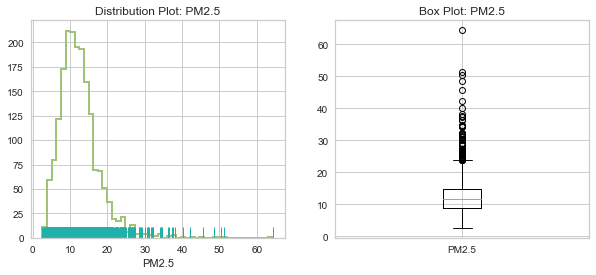

In [8]:
cols = df.columns.to_list()

for col in cols:
        
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    sns.distplot(df[col], kde=False, rug=True, rug_kws={"color": "lightseagreen"}, hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "g"})
    plt.xlabel(col)
    plt.title('Distribution Plot: {}'.format(col))

    plt.subplot(1,2,2)
    df.boxplot(column = col)
    plt.title('Box Plot: {}'.format(col))
    plt.show()

### Bivariate Analysis

#### Continuous Features vs Target Variable

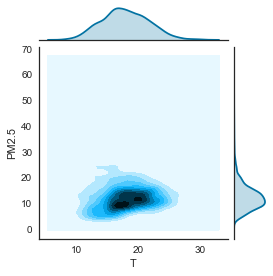

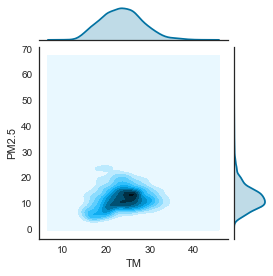

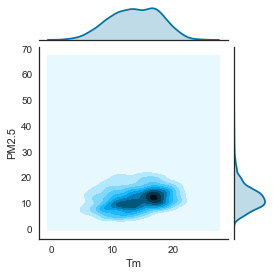

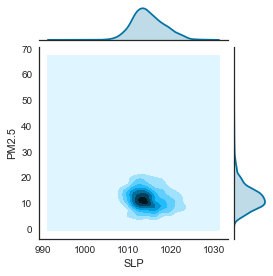

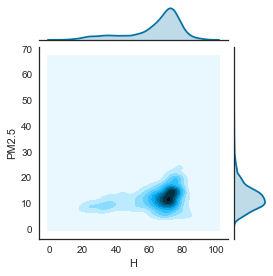

In [9]:
cols_ = ['T', 'TM', 'Tm', 'SLP', 'H']

for col in cols_:
    
    with sns.axes_style('white'):
        sns.jointplot(col, "PM2.5", df, kind='kde', height=4);

    plt.show()

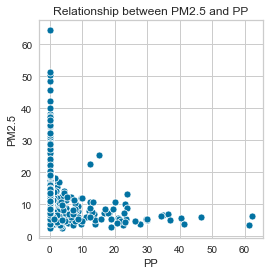

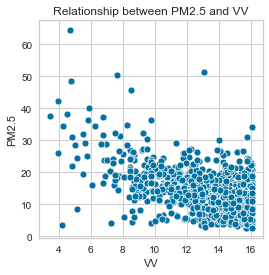

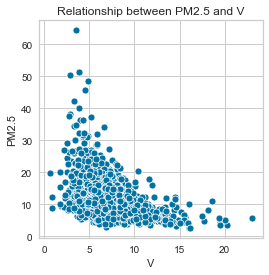

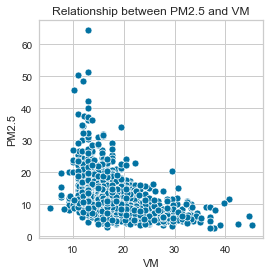

In [10]:
cols__ = ['PP', 'VV', 'V', 'VM']

for col in cols__:
    plt.figure(figsize=(4, 4))
    sns.scatterplot(data=df, x=col, y="PM2.5")
    plt.title ("Relationship between PM2.5 and {}".format(col))
    plt.show()

#### Interesting Obsevation between Continuous Features and Target Variables

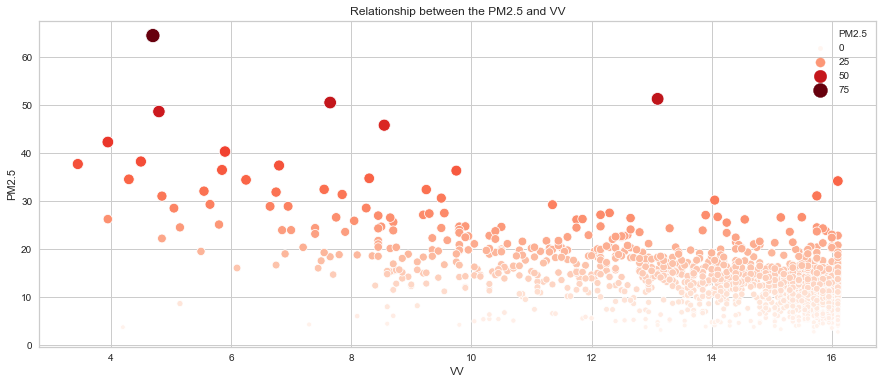

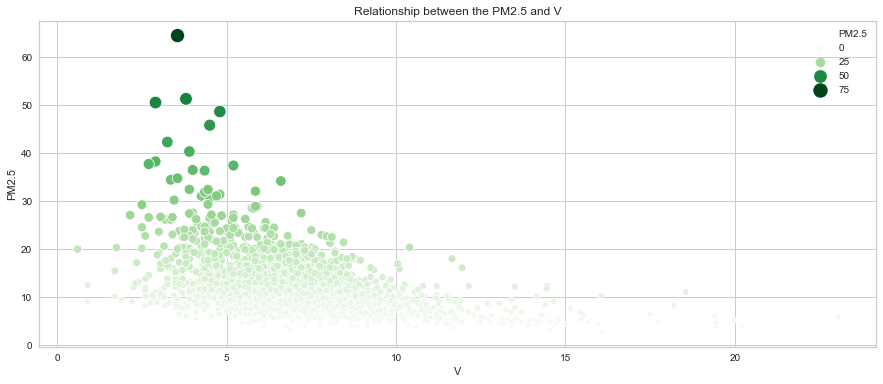

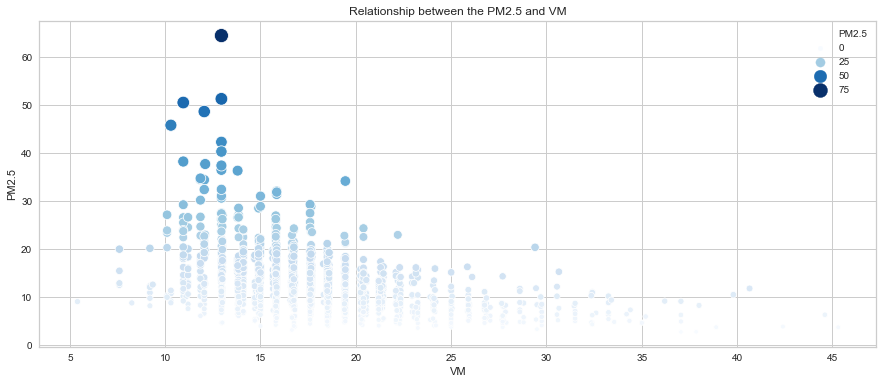

In [11]:
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data=df, x="VV", y="PM2.5", hue="PM2.5", size="PM2.5",
    sizes=(20, 200), legend='brief', palette='Reds')
plt.title ("Relationship between the PM2.5 and VV")
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(
    data=df, x="V", y="PM2.5", hue="PM2.5", size="PM2.5",
    sizes=(20, 200), legend='brief', palette='Greens')
plt.title ("Relationship between the PM2.5 and V")
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(
    data=df, x="VM", y="PM2.5", hue="PM2.5", size="PM2.5",
    sizes=(20, 200), legend='brief', palette='Blues')
plt.title ("Relationship between the PM2.5 and VM")
plt.show()

### Multivariate Analysis

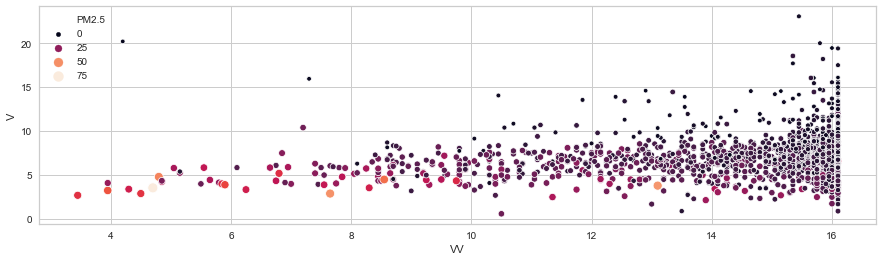

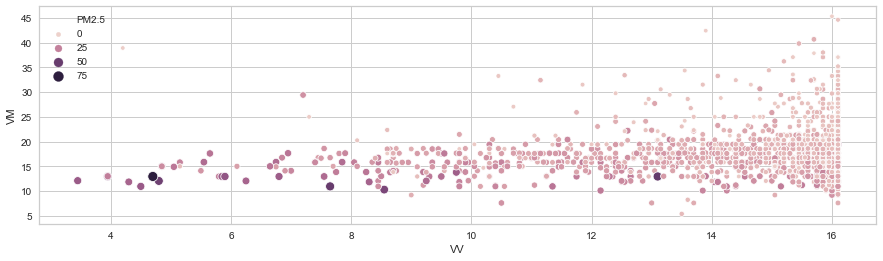

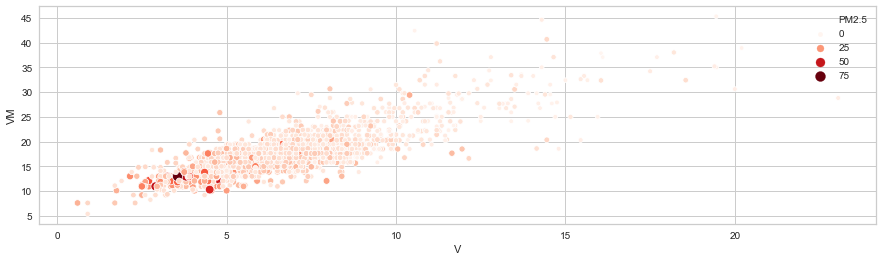

In [12]:
plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df, x="VV", y="V", hue="PM2.5", size="PM2.5",
    sizes=(20, 100), legend="brief", palette = 'rocket')
plt.show()

plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df, x="VV", y="VM", hue="PM2.5", size="PM2.5",
    sizes=(20, 100), legend="brief")
plt.show()

plt.figure(figsize=(15, 4))
sns.scatterplot(
    data=df, x="V", y="VM", hue="PM2.5", size="PM2.5",
    sizes=(20, 100), legend="brief", palette = 'Reds')
plt.show()

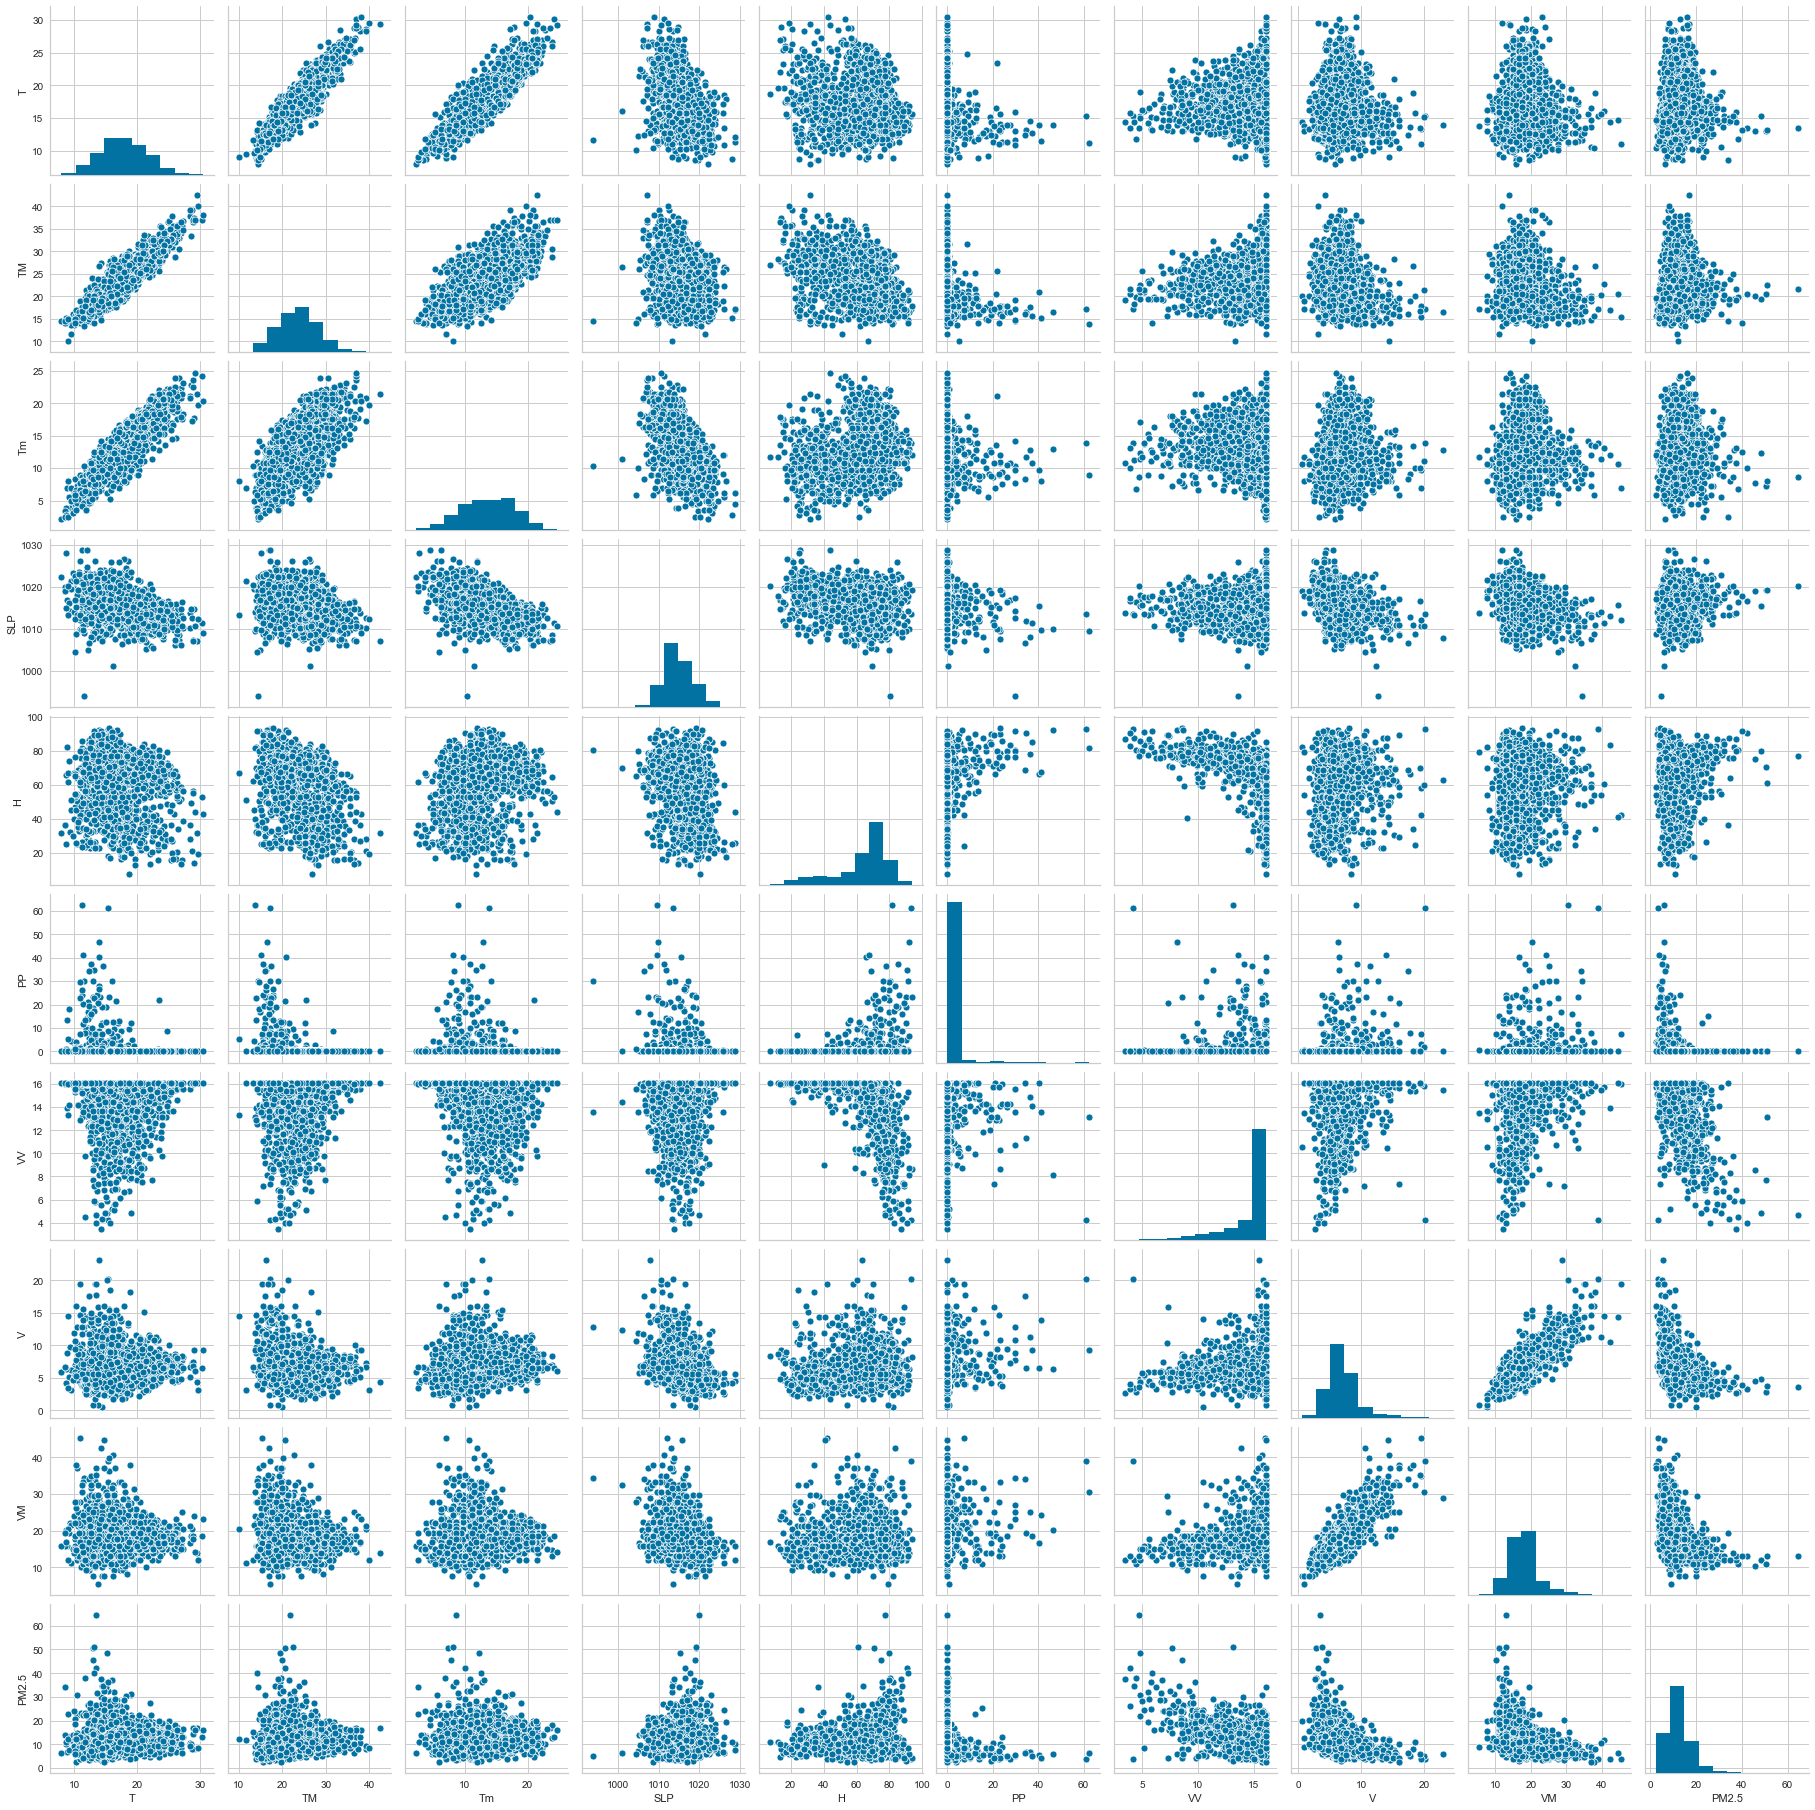

In [13]:
sns.pairplot(df, diag_kind="hist", corner=False, palette = 'Set2')